In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
from matplotlib import pyplot as plt

In [2]:
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2024, 1, 31)

In [3]:
index_data = yf.download("^GSPC", start, end, interval = '1h')
stock_data = yf.download("AAPL", start, end, interval = '1h')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
def convert(data):
    daily = data.resample('D').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'

    })

    return daily

index_daily = convert(index_data)
stock_daily = convert(stock_data)

stock_daily.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-01-03 00:00:00-05:00,129.770004,130.899994,124.169998,125.050003,96727462
2023-01-04 00:00:00-05:00,126.889999,128.655701,125.080002,126.379997,80602641
2023-01-05 00:00:00-05:00,127.129997,127.769997,124.760002,125.019997,71834671
2023-01-06 00:00:00-05:00,126.010002,130.289993,124.889999,129.520004,76325908
2023-01-07 00:00:00-05:00,NaN,NaN,NaN,NaN,0


In [5]:
def returns(data):
    close_data = data['Close']
    returns = ((close_data - close_data.shift(1))/close_data.shift(1))*100
    return returns

index_daily_return = returns(index_daily)
stock_daily_return = returns(stock_daily)


In [6]:
def cumulative_return(data):
    cum_ret = (1 + data/100).cumprod() - 1
    return cum_ret*100
index_cum_ret = cumulative_return(index_daily_return)
stock_cum_ret = cumulative_return(stock_daily_return)


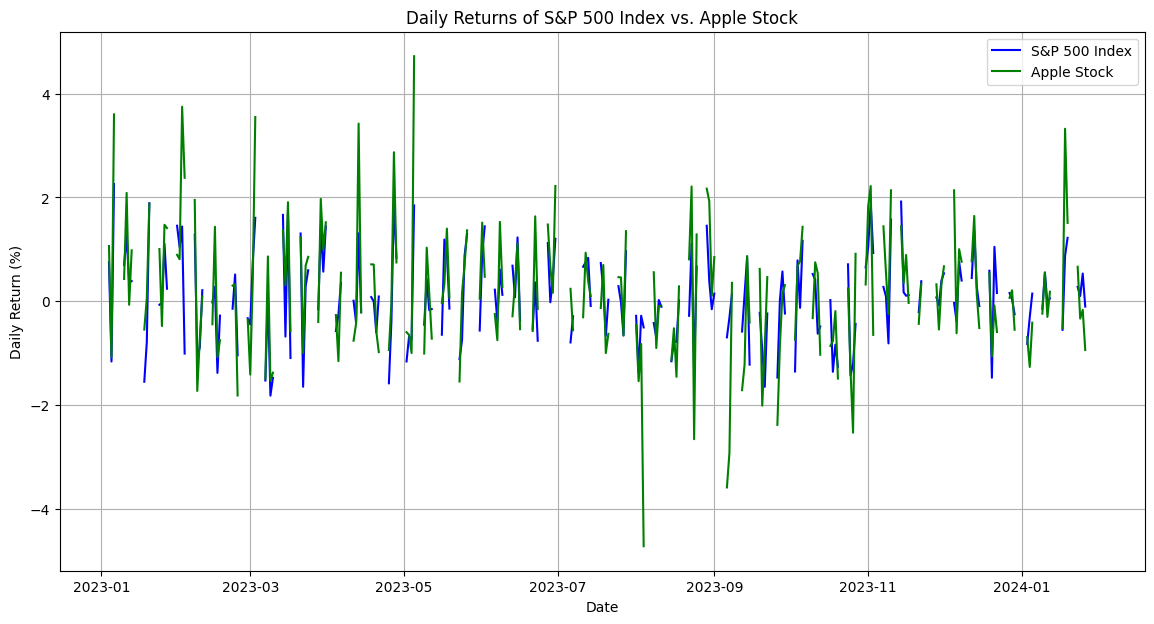

In [7]:

plt.figure(figsize=(14, 7))
plt.plot(index_daily_return, label='S&P 500 Index', color='blue')
plt.plot(stock_daily_return, label='Apple Stock', color='green')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.title('Daily Returns of S&P 500 Index vs. Apple Stock')
plt.legend()
plt.grid(True)
plt.show()

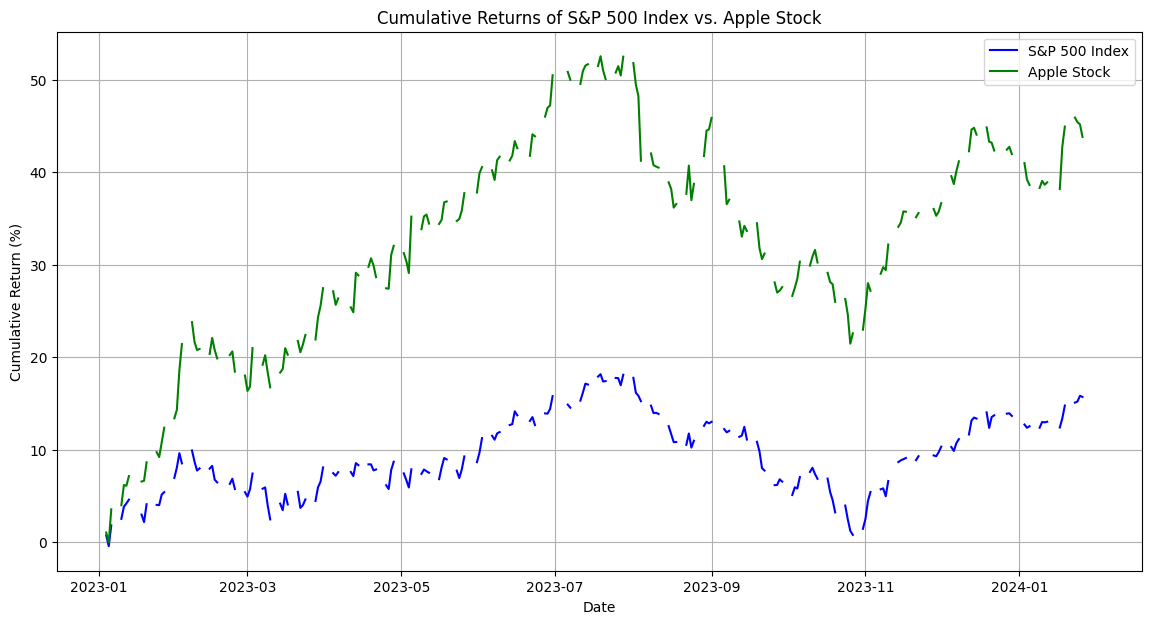

In [8]:

plt.figure(figsize=(14, 7))
plt.plot(index_cum_ret, label='S&P 500 Index', color='blue')
plt.plot(stock_cum_ret, label='Apple Stock', color='green')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Returns of S&P 500 Index vs. Apple Stock')
plt.legend()
plt.grid(True)
plt.show()

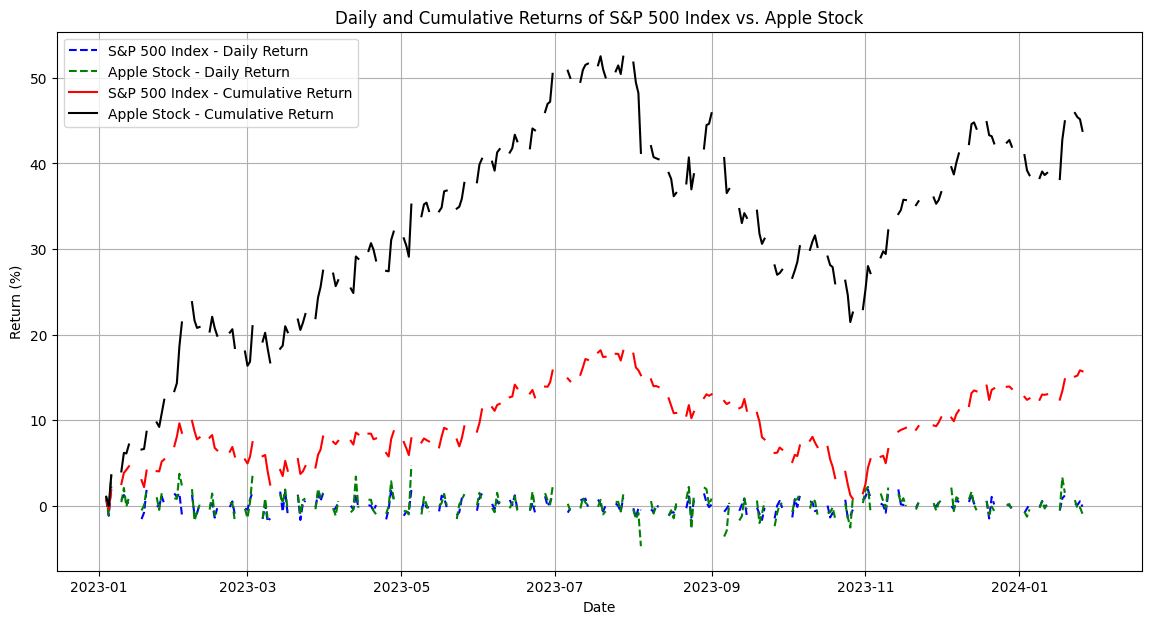

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(index_daily_return, label='S&P 500 Index - Daily Return', color='blue', linestyle='--')
plt.plot(stock_daily_return, label='Apple Stock - Daily Return', color='green', linestyle='--')

plt.plot(index_cum_ret, label='S&P 500 Index - Cumulative Return', color='red')
plt.plot(stock_cum_ret, label='Apple Stock - Cumulative Return', color='black')

plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.title('Daily and Cumulative Returns of S&P 500 Index vs. Apple Stock')
plt.legend()
plt.grid(True)
plt.show()


# Q2

In [11]:
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2024, 1, 31)

In [12]:
stock_data = yf.download("AAPL", start, end, interval = '1h')

[*********************100%%**********************]  1 of 1 completed


In [13]:
def convert(data):
    daily = data.resample('D').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'

    })

    return daily

stock_daily = convert(stock_data)

In [14]:
stock_daily['Day of Week'] = stock_daily.index.day_name()

In [15]:
avg = stock_daily.groupby('Day of Week')['Close'].mean()
df = pd.DataFrame()
df['Avg Closing Price'] = avg
df.reset_index(inplace=True)
max_avg = df.loc[df['Avg Closing Price'].idxmax()]
print(df)
print("Maximum Average Closing Price:", max_avg['Avg Closing Price'], "on:", max_avg['Day of Week'])

  Day of Week  Avg Closing Price
0      Friday         174.332819
1      Monday         174.294340
2    Saturday                NaN
3      Sunday                NaN
4    Thursday         173.366010
5     Tuesday         173.243695
6   Wednesday         173.267582
Maximum Average Closing Price: 174.33281888094817 on: Friday


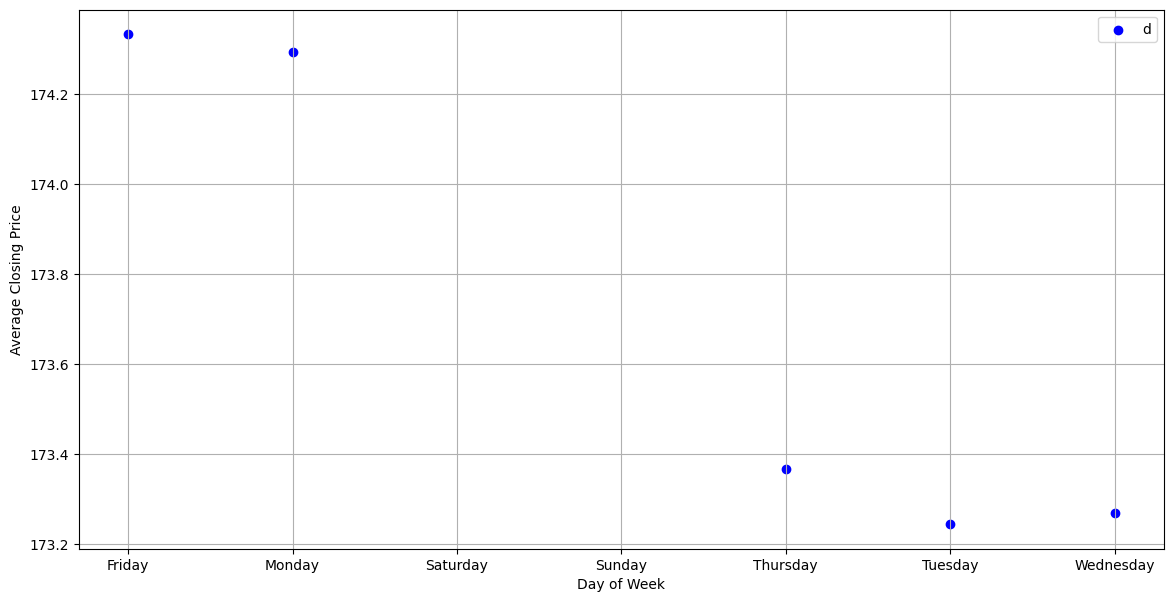

In [16]:
plt.figure(figsize=(14, 7))
plt.scatter(df['Day of Week'], df['Avg Closing Price'], label='d', color='blue')
plt.xlabel('Day of Week')
plt.ylabel('Average Closing Price')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()

[None, None, None, None, None, None, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [19]:
def RollingMean(data, col):
    mean = 0

    prices = []
    for  i in range(0,len(data)):
        if(i<7):
           prices.append(0)
        else:
            mean = (data.loc[i-7,col]+data.loc[i-1,col]+data.loc[i-2,col]+data.loc[i-3,col]+data.loc[i-4,col]+data.loc[i-5,col]+data.loc[i-6,col])/7
            prices.append(mean)

    data['Mean']=prices
    return data
